<div style="background-color:#EAF4EC; padding:20px; border-radius:10px;">

<h2 style="color:#2F6F4E; text-align:center; margin-bottom:5px;">
Clustering Analysis — Governance Typologies
</h2>

<h4 style="color:#2F6F4E; text-align:center; margin-top:0;">
Master Thesis – ESG Governance Indicators (EU-27)
</h4>

<p style="font-size:14px; color:#000000;">
This notebook implements the <strong>Clustering</strong> stage of the CRISP-ML(Q) methodology.
The objective is to identify <strong>governance typologies</strong> among EU-27 countries based on
the previously preprocessed and scaled governance indicators before the forecasting stage.
</p>

<p style="font-size:14px; color:#000000;">
This notebook does not modify the data. It relies exclusively on the processed and scaled dataset
generated in the previous preprocessing step, ensuring methodological consistency and reproducibility.
</p>

</div>

In [8]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler

In [4]:
DATA_PATH = Path("../data/processed/data_EU27_2000_2030_ALL.csv")
df_clustering = pd.read_csv(DATA_PATH)

In [6]:
df_clustering.head()

Country Name Country Code                                    Indicator Name  \
0      Austria          AUT                   Control of Corruption: Estimate   
1      Austria          AUT                             GDP growth (annual %)   
2      Austria          AUT                Government Effectiveness: Estimate   
3      Austria          AUT  Individuals using the Internet (% of population)   
4      Austria          AUT                                     Net migration   

      Indicator Code          2000          2001          2002          2003  \
0             CC.EST      1.751059      1.751059      1.915159      1.963869   
1  NY.GDP.MKTP.KD.ZG      3.189523      1.316987      1.484369      1.141565   
2             GE.EST      1.847265      1.847265      1.880228      1.930461   
3     IT.NET.USER.ZS     33.700000     39.200000     36.600000     42.700000   
4        SM.POP.NETM  17631.000000  39866.000000  37508.000000  44362.000000   

           2004          2005  ...          2021           2022         2023  \
0      2.026624      1.912423  ...      1.242727       1.258587     1.133653   
1      2.565255      2.320365  ...      4.795329       5.277894    -0.954963   
2      1.843771      1.679529  ...      1.528295       1.464923     1.326681   
3     54.300000     58.000000  ...     92.500000      93.600000    95.300000   
4  55007.000000  50676.000000  ...  52150.000000  157365.000000  4819.000000   

           2024          2025          2026           2027           2028  \
0      1.210343      1.212447      1.132182       1.110355       1.065604   
1      4.326743      1.715234      0.310525       1.874670       0.063588   
2      1.305117      1.257644      1.144865       1.052855       0.953598   
3     95.603996     95.806404     96.360672      97.868874      97.921783   
4  25555.669922 -11889.741211 -98510.460938 -107961.046875 -145539.843750   

            2029           2030  
0       0.975016       0.906785  
1      -0.605671       0.707378  
2       0.953921       0.927187  
3      98.096069      97.939156  
4 -146465.843750 -127241.601562  

[5 rows x 35 columns]

In [9]:
# copiar para segurança
df_scaled2 = df_clustering.copy()

# colunas dos anos
year_cols = [c for c in df_scaled2.columns if c.isdigit()]

scaler = StandardScaler()

# escalar por indicador (CORRETO)
for ind in df_scaled2["Indicator Code"].unique():
    mask = df_scaled2["Indicator Code"] == ind
    values = df_scaled2.loc[mask, year_cols].astype(float)

    df_scaled2.loc[mask, year_cols] = scaler.fit_transform(values)

In [10]:
df_scaled2[year_cols].describe().round(2)

2000    2001    2002    2003    2004    2005    2006    2007    2008  \
count  405.00  405.00  405.00  405.00  405.00  405.00  405.00  405.00  405.00   
mean     0.00    0.00    0.00   -0.00   -0.00    0.00   -0.00   -0.00   -0.00   
std      1.00    1.00    1.00    1.00    1.00    1.00    1.00    1.00    1.00   
min     -3.25   -3.35   -3.34   -3.48   -3.81   -3.65   -3.69   -3.54   -3.52   
25%     -0.63   -0.63   -0.60   -0.62   -0.61   -0.63   -0.58   -0.59   -0.58   
50%     -0.20   -0.18   -0.21   -0.19   -0.18   -0.21   -0.14   -0.18   -0.16   
75%      0.59    0.59    0.61    0.58    0.61    0.61    0.60    0.61    0.61   
max      4.87    4.87    4.85    4.85    4.84    4.83    4.83    4.80    4.82   

         2009  ...    2021    2022    2023    2024    2025    2026    2027  \
count  405.00  ...  405.00  405.00  405.00  405.00  405.00  405.00  405.00   
mean    -0.00  ...   -0.00   -0.00    0.00   -0.00   -0.00    0.00   -0.00   
std      1.00  ...    1.00    1.00    1.00    1.00    1.00    1.00    1.00   
min     -3.46  ...   -2.55   -2.51   -2.86   -2.83   -2.88   -2.96   -3.37   
25%     -0.61  ...   -0.61   -0.65   -0.62   -0.70   -0.69   -0.71   -0.71   
50%     -0.09  ...   -0.17   -0.17   -0.16   -0.15   -0.13   -0.09   -0.09   
75%      0.55  ...    0.61    0.64    0.61    0.61    0.57    0.58    0.61   
max      4.82  ...    4.70    4.70    4.70    4.68    4.24    4.02    3.80   

         2028    2029    2030  
count  405.00  405.00  405.00  
mean    -0.00    0.00    0.00  
std      1.00    1.00    1.00  
min     -3.05   -3.14   -3.20  
25%     -0.76   -0.70   -0.71  
50%     -0.10   -0.10   -0.11  
75%      0.69    0.75    0.75  
max      4.06    4.38    4.14  

[8 rows x 31 columns]

<div style="background-color:#EAF4EC; padding:16px; border-radius:10px;">

<h2 style="color:#2F6F4E; margin-bottom:5px; font-size:20px;">
RESHAPING THE DATASET  
</h2> 

Clustering algorithms group observations (rows). In our research question, the entity we want to group is the country (EU Member State), not the pair (country, indicator).

- Current format (long): each row is Country × Indicator with yearly values as columns.
If we clustered this table, the algorithm would group indicator-series (e.g., “Austria–CC.EST”) rather than countries.

- Required format (wide): each row must represent one country, described by the full set of governance trajectories.
We therefore reshape the data so that the features become (Indicator Code × Year), e.g., CC.EST_2000, GE.EST_2000, …

This creates a single multidimensional vector per country, making distance-based clustering meaningful.

In [11]:
# 1) Identify year columns (e.g., '2000', '2001', ...)
year_cols = [c for c in df_scaled2.columns if c.isdigit()]

# 2) Pivot: one row per country, columns = (Indicator Code, Year)
# Result: index = Country Name, columns = MultiIndex (Indicator Code, Year)
df_pivot = (
    df_scaled2
    .set_index(["Country Name", "Indicator Code"])[year_cols]
    .stack()                                   # -> index: (Country, Indicator, Year)
    .unstack(["Indicator Code", None])         # -> columns: (Indicator, Year)
)

# 3) Flatten MultiIndex columns into single strings: 'INDICATORCODE_YEAR'
df_pivot.columns = [f"{ind}_{year}" for ind, year in df_pivot.columns]

# 4) Quick checks
print("Shape (countries, features):", df_pivot.shape)
display(df_pivot.head())

Shape (countries, features): (27, 465)


CC.EST_2000  CC.EST_2001  CC.EST_2002  CC.EST_2003  CC.EST_2004  \
Country Name                                                                    
Austria          0.913220     0.913220     1.136779     1.234566     1.313986   
Belgium          0.531870     0.531870     0.574330     0.454488     0.444488   
Bulgaria        -1.505863    -1.505863    -1.429884    -1.483179    -1.241906   
Croatia         -1.326292    -1.326292    -0.941731    -1.024949    -1.018521   
Cyprus           0.073519     0.073519     0.166636     0.212279    -0.191252   

              CC.EST_2005  CC.EST_2006  CC.EST_2007  CC.EST_2008  CC.EST_2009  \
Country Name                                                                    
Austria          1.229596     1.097311     1.195707     1.017507     0.869447   
Belgium          0.494570     0.328506     0.391593     0.442387     0.574404   
Bulgaria        -1.370822    -1.469822    -1.544382    -1.577939    -1.475136   
Croatia         -1.204925    -1.271662    -1.187848    -1.301209    -1.300602   
Cyprus          -0.161993     0.053735     0.055637     0.233238    -0.091908   

              ...  VA.EST_2021  VA.EST_2022  VA.EST_2023  VA.EST_2024  \
Country Name  ...                                                       
Austria       ...     0.900373     0.903168     0.788244     0.821645   
Belgium       ...     0.574667     0.580743     0.560284     0.432141   
Bulgaria      ...    -2.208450    -2.211811    -1.936691    -1.980228   
Croatia       ...    -1.313293    -1.302390    -1.454866    -1.497786   
Cyprus        ...    -0.596222    -0.654970    -0.375764    -0.248516   

              VA.EST_2025  VA.EST_2026  VA.EST_2027  VA.EST_2028  VA.EST_2029  \
Country Name                                                                    
Austria          0.819413     0.784339     0.804972     0.785441     0.759822   
Belgium          0.516799     0.545584     0.588355     0.660527     0.683474   
Bulgaria        -2.115910    -2.196942    -2.134758    -2.093034    -2.082962   
Croatia         -1.474304    -1.432476    -1.500607    -1.552767    -1.544976   
Cyprus          -0.132817    -0.108437    -0.188272    -0.186456    -0.215099   

              VA.EST_2030  
Country Name               
Austria          0.756002  
Belgium          0.702622  
Bulgaria        -2.114681  
Croatia         -1.444808  
Cyprus          -0.219744  

[5 rows x 465 columns]

<div style="background-color:#EAF4EC; padding:16px; border-radius:10px;">

<h2 style="color:#2F6F4E; margin-bottom:5px; font-size:20px;">
Principal Component Analysis (PCA)
</h2> 

After reshaping the dataset, each country is represented by a high-dimensional vector (Indicator × Year), resulting in ~360 features for only 27 observations.

This creates typical issues for distance-based clustering:
- Many features are highly correlated (especially adjacent years within the same indicator).
- Distances become noisy and less informative in high-dimensional spaces.
- Clustering results may become unstable and sensitive to small fluctuations.

PCA transforms the original features into a smaller set of orthogonal components that capture most of the variance in the data.

We keep enough components to explain a predefined proportion of variance (85%–95%), ensuring that:
- the main governance patterns are preserved,
- noise and redundancy are reduced,
- clustering becomes more robust and interpretable.

In [12]:
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import pandas as pd

# Impute NaNs (mean)
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(df_pivot)

print("NaNs after imputation:", np.isnan(X_imputed).sum())

# PCA (keep 85% variance)
pca = PCA(n_components=0.85, random_state=42)
X_pca = pca.fit_transform(X_imputed)

print("Original shape:", df_pivot.shape)
print("PCA shape:", X_pca.shape)
print("Explained variance (total):", pca.explained_variance_ratio_.sum())

# Optional: DataFrame for convenience
df_pca = pd.DataFrame(
    X_pca,
    index=df_pivot.index,
    columns=[f"PC{i+1}" for i in range(X_pca.shape[1])]
)

df_pca.head(27)

NaNs after imputation: 0
Original shape: (27, 465)
PCA shape: (27, 6)
Explained variance (total): 0.8509351721332827


PC1        PC2        PC3        PC4       PC5  \
Country Name                                                            
Austria          13.178865  -1.243174  -2.954463   1.421413 -1.325105   
Belgium          11.951944  -2.859486  11.351367  -6.830347  5.441465   
Bulgaria        -24.543630   0.449302   4.144903   7.115290 -1.060931   
Croatia         -16.943839  -2.371360   7.853907   0.959674  5.280652   
Cyprus           -8.867850  -3.699253  -2.789154  -0.293612 -6.853814   
Czechia          -3.879493  -2.695149  -1.786298   1.087220  4.406092   
Denmark          23.759930  -4.628006   0.637389   1.829871 -2.603805   
Estonia           2.657112  -7.336302  -0.781628   3.410223 -1.128724   
Finland          26.019494  -6.583103   5.549065   1.550920  3.255559   
France            6.538578  13.989259   2.409798   0.907407 -2.916504   
Germany          19.371464  33.046135  -8.500724   7.215905  3.257102   
Greece          -18.840355   2.671981   0.653701  -3.346462 -4.680822   
Hungary         -12.414288  -2.066862  -3.405450   1.715319  0.816090   
Ireland           8.362739  -9.186847  -7.267356  -4.403524 -1.612840   
Italy           -11.174367  17.696483   0.440333  -9.241823  2.968492   
Latvia           -9.074648  -4.596654   0.161286   4.279101 -3.614793   
Lithuania        -6.759069  -4.858520  -2.621119   7.833271 -2.435853   
Luxembourg       15.768358 -10.047771  -8.561080  -2.290064 -1.683499   
Malta            -7.613491  -5.559007 -14.025885 -12.128921  5.708280   
Netherlands      19.213352  -0.296854  -2.083948   0.215979 -3.590674   
Poland          -11.689359   4.105477  -0.717822   1.491840  1.057951   
Portugal         -0.796730  -1.200192   1.417017   1.169252 -1.885443   
Romania         -27.427789  -0.027466   1.466078   1.626768  4.354493   
Slovak Republic -11.425070  -3.640034  -0.345593   1.628684  1.477445   
Slovenia         -1.978272  -4.419517   1.566970   2.634297  2.226645   
Spain             0.317606   9.667876  10.028669 -10.706727 -9.468932   
Sweden           26.288806  -4.310956   8.160037   1.149047  4.611473   

                      PC6  
Country Name               
Austria         -8.331367  
Belgium          3.702762  
Bulgaria        -3.188200  
Croatia          1.821160  
Cyprus           1.523918  
Czechia         -0.183753  
Denmark         -3.280014  
Estonia          5.412581  
Finland         -1.119511  
France           0.311726  
Germany          4.268807  
Greece          -5.749659  
Hungary         -1.664361  
Ireland          7.682246  
Italy           -3.263340  
Latvia           5.049399  
Lithuania        1.871815  
Luxembourg       1.196980  
Malta           -1.864800  
Netherlands     -2.357157  
Poland          -0.667906  
Portugal        -5.398560  
Romania          3.686900  
Slovak Republic  1.716779  
Slovenia        -4.201325  
Spain            3.823862  
Sweden          -0.798981

PCA reduced the original dataset from 360 features to 5 principal components, explaining about 86% of the total variance.  
These components capture the main governance patterns across countries and are used as input for clustering.

<div style="background-color:#EAF4EC; padding:16px; border-radius:10px;">

<h2 style="color:#2F6F4E; margin-bottom:5px; font-size:20px;">
Clustering 
</h2> 

<div style="background-color:#EAF4EC; padding:16px; border-radius:10px;">

<h2 style="color:#2F6F4E; margin-bottom:5px; font-size:20px;">
Elbow Method
</h2> 

##### Selecting the number of clusters

Before applying clustering, the optimal number of clusters was evaluated using internal validation methods.
The elbow method and silhouette score were used to balance model compactness and cluster separation.


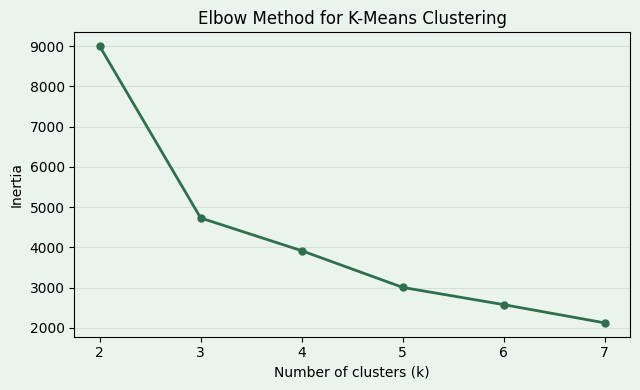

In [13]:
ACCENT = "#2F6F4E"
BACKGROUND = "#EAF4EC"

inertia = []
K_range = range(2, 8)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df_pca)
    inertia.append(km.inertia_)

fig, ax = plt.subplots(figsize=(6.5, 4))
fig.patch.set_facecolor(BACKGROUND)
ax.set_facecolor(BACKGROUND)

ax.plot(
    K_range,
    inertia,
    marker="o",
    linewidth=2,
    markersize=5,
    color=ACCENT
)

ax.set_xlabel("Number of clusters (k)")
ax.set_ylabel("Inertia")
ax.set_title("Elbow Method for K-Means Clustering")

ax.grid(True, axis="y", alpha=0.3)
ax.grid(False, axis="x")

plt.tight_layout()
plt.show()


Based on the elbow method, the reduction in inertia stabilizes after four clusters.
Therefore, k = 4 was selected as the optimal number of clusters, balancing model parsimony and explanatory power.


<div style="background-color:#EAF4EC; padding:16px; border-radius:10px;">

<h2 style="color:#2F6F4E; margin-bottom:5px; font-size:20px;">
Sillhouette Analysis
</h2> 

In [14]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

for k in range(2, 7):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(df_pca)
    score = silhouette_score(df_pca, labels)
    print(f"k={k} | silhouette={score:.3f}")


k=2 | silhouette=0.423
k=3 | silhouette=0.377
k=4 | silhouette=0.317
k=5 | silhouette=0.260
k=6 | silhouette=0.237


Although k = 2 maximizes the silhouette score, k = 3 provides a more informative and substantively meaningful partition of EU countries and was therefore selected.


<div style="background-color:#EAF4EC; padding:16px; border-radius:10px;">

<h2 style="color:#2F6F4E; margin-bottom:5px; font-size:20px;">
CLUSTER METHODS 
</h2> 

##### Choice of clustering algorithm

K-Means was selected as the main clustering method due to its interpretability, robustness with PCA-transformed data, and suitability for small, structured datasets.

<div style="background-color:#EAF4EC; padding:16px; border-radius:10px;">

<h2 style="color:#2F6F4E; margin-bottom:5px; font-size:20px;">
K-Means Clustering
</h2> 

K-Means clustering was applied to the PCA-reduced dataset using k = 3 clusters, as determined by the elbow method and supported by silhouette analysis.

The algorithm groups countries based on their proximity in the reduced feature space, allowing the identification of distinct governance typologies across EU Member States.

In [15]:
# Apply K-Means with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
df_pca["cluster_km"] = kmeans.fit_predict(df_pca)

# Check cluster assignment by country
df_pca[["cluster_km"]].sort_values("cluster_km")
df_pca["cluster_km"].value_counts().sort_index()

cluster_km
0     1
1    17
2     9
Name: count, dtype: int64

PC0 - 1 countrie

PC1 - 17 countries

PC2 - 9 countries 

##### TOTAL - 27 Countries

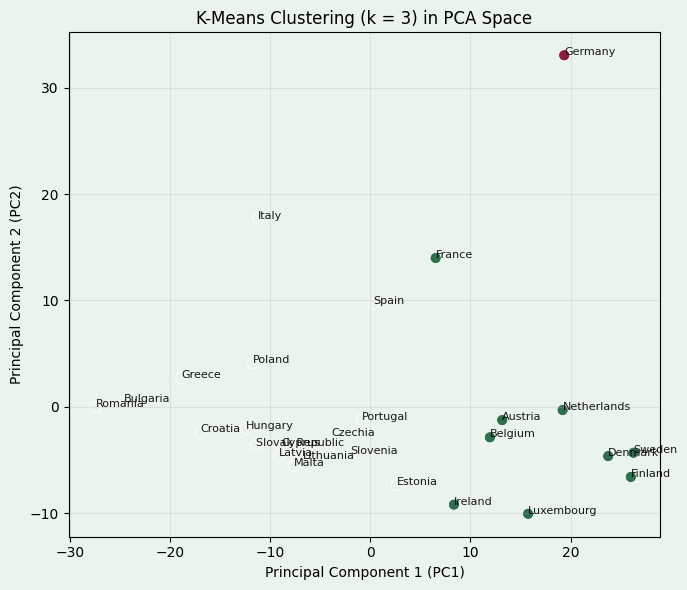

In [16]:
BACKGROUND = "#EAF4EC"

# Distinct, thesis-safe colors
cluster_colors = ["#8B1E3F", "#EAF4EC", "#2F6F4E"]
cmap = ListedColormap(cluster_colors)

fig, ax = plt.subplots(figsize=(7, 6))
fig.patch.set_facecolor(BACKGROUND)
ax.set_facecolor(BACKGROUND)

scatter = ax.scatter(
    df_pca["PC1"],
    df_pca["PC2"],
    c=df_pca["cluster_km"],
    cmap=cmap,
    s=65,
    edgecolor="white",
    linewidth=0.6
)

# Country labels
for country in df_pca.index:
    ax.text(
        df_pca.loc[country, "PC1"],
        df_pca.loc[country, "PC2"],
        country,
        fontsize=8,
        alpha=0.9
    )

ax.set_xlabel("Principal Component 1 (PC1)")
ax.set_ylabel("Principal Component 2 (PC2)")
ax.set_title("K-Means Clustering (k = 3) in PCA Space")

ax.grid(True, alpha=0.25)

plt.tight_layout()
plt.show()

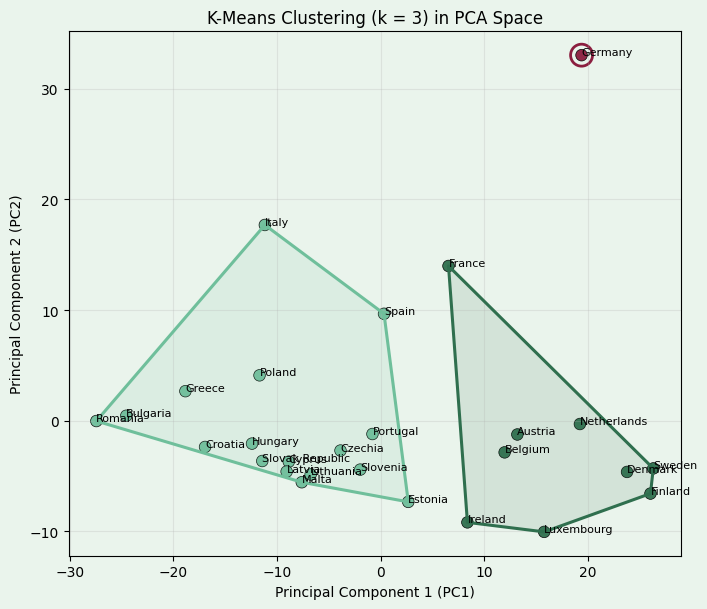

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

BACKGROUND = "#EAF4EC"

# Cluster colors (your palette)
cluster_colors = ["#8B1E3F", "#6FBF9B", "#2F6F4E"]
cmap = ListedColormap(cluster_colors)

# Try convex hull; if scipy not available, we'll fallback later
try:
    from scipy.spatial import ConvexHull
    HAS_SCIPY = True
except Exception:
    HAS_SCIPY = False

fig, ax = plt.subplots(figsize=(7.2, 6.2))
fig.patch.set_facecolor(BACKGROUND)
ax.set_facecolor(BACKGROUND)

# Scatter
ax.scatter(
    df_pca["PC1"], df_pca["PC2"],
    c=df_pca["cluster_km"],
    cmap=cmap,
    s=70,
    edgecolor="black",
    linewidth=0.5,
    alpha=0.95
)

# Labels
for country in df_pca.index:
    ax.text(df_pca.loc[country, "PC1"], df_pca.loc[country, "PC2"], country, fontsize=8)

# Draw hulls (or fallback)
for k, col in enumerate(cluster_colors):
    pts = df_pca[df_pca["cluster_km"] == k][["PC1", "PC2"]].to_numpy()

    if pts.shape[0] < 3:
        # Too few points to form a hull; just skip or draw a small circle around them
        ax.scatter(pts[:, 0], pts[:, 1], s=250, facecolor="none", edgecolor=col, linewidth=2)
        continue

    if HAS_SCIPY:
        hull = ConvexHull(pts)
        hull_pts = pts[hull.vertices]
        # Close the polygon
        hull_pts = np.vstack([hull_pts, hull_pts[0]])

        ax.plot(hull_pts[:, 0], hull_pts[:, 1], color=col, linewidth=2.2)
        ax.fill(hull_pts[:, 0], hull_pts[:, 1], color=col, alpha=0.12)
    else:
        # Fallback: draw a simple ellipse-ish region (approx) using covariance
        mean = pts.mean(axis=0)
        cov = np.cov(pts.T)
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        vals, vecs = vals[order], vecs[:, order]

        # 2-sigma ellipse scale (you can tweak)
        t = np.linspace(0, 2*np.pi, 200)
        ellipse = np.stack([np.cos(t), np.sin(t)])
        scale = 2.2 * np.sqrt(vals)
        ellipse = (vecs @ (ellipse * scale[:, None])).T + mean

        ax.plot(ellipse[:, 0], ellipse[:, 1], color=col, linewidth=2.2)
        ax.fill(ellipse[:, 0], ellipse[:, 1], color=col, alpha=0.12)

ax.set_xlabel("Principal Component 1 (PC1)")
ax.set_ylabel("Principal Component 2 (PC2)")
ax.set_title("K-Means Clustering (k = 3) in PCA Space")
ax.grid(True, alpha=0.25)

plt.tight_layout()
plt.show()


#### K-Means clustering in PCA

The PC1–PC2 plot shows a clear separation between governance profiles.
Countries such as Finland, Sweden, Denmark, the Netherlands and Austria appear on the right-hand side (high PC1), forming a high-governance cluster.
Countries like Romania, Bulgaria and Croatia are positioned on the left-hand side (low PC1), reflecting weaker or catching-up governance profiles.

Germany appears clearly isolated from the remaining countries, indicating a distinct governance structure.
Overall, the visualization confirms that K-Means identifies meaningful and interpretable governance typologies across EU countries.


<div style="background-color:#EAF4EC; padding:16px; border-radius:10px;">

<h2 style="color:#2F6F4E; margin-bottom:5px; font-size:20px;">
Hierarchical Clustering
</h2> 

To assess the robustness of the K-Means solution, hierarchical clustering using Ward linkage was applied to the PCA-reduced data.
This complementary approach allows verification of whether similar governance groupings emerge independently of the clustering algorithm.

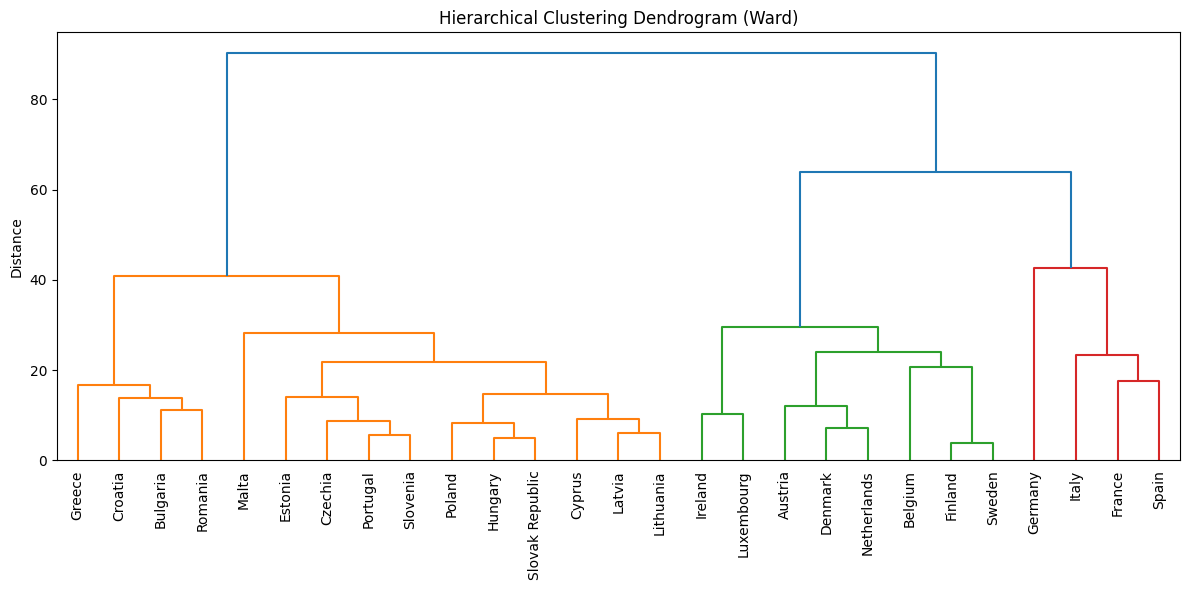

In [18]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Hierarchical clustering (Ward)
Z = linkage(df_pca, method="ward")

plt.figure(figsize=(12, 6))
dendrogram(
    Z,
    labels=df_pca.index,
    leaf_rotation=90
)
plt.title("Hierarchical Clustering Dendrogram (Ward)")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

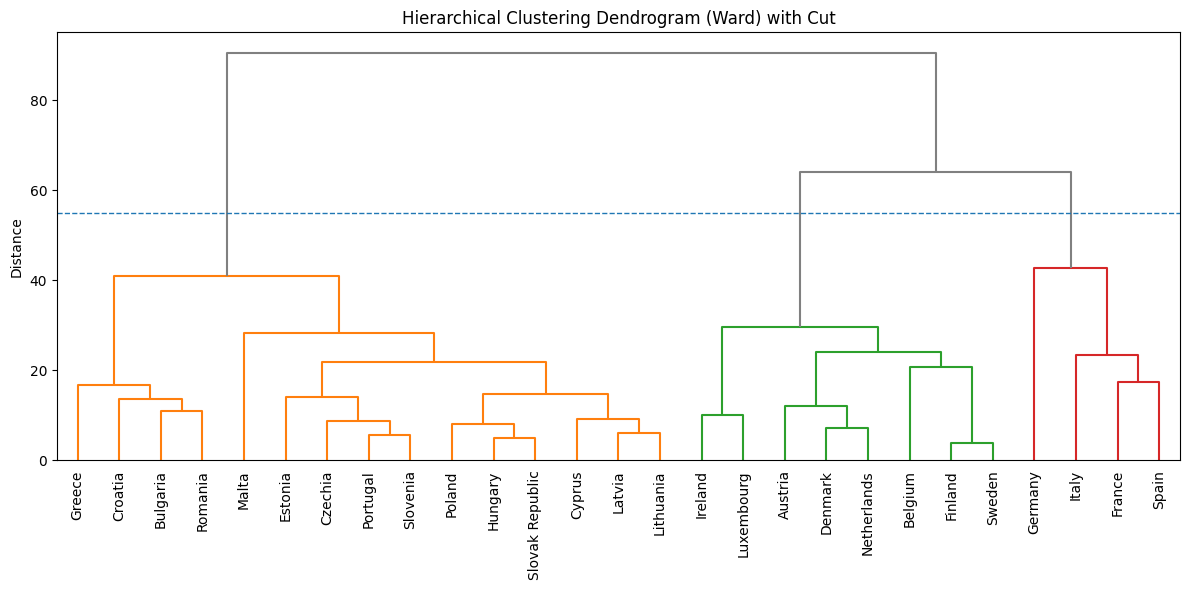

cluster_hc_cut
Country Name                   
Romania                       1
Malta                         1
Hungary                       1
Greece                        1
Poland                        1
Portugal                      1
Latvia                        1
Lithuania                     1
Slovak Republic               1
Czechia                       1
Cyprus                        1
Croatia                       1
Bulgaria                      1
Slovenia                      1
Estonia                       1
Netherlands                   2
Austria                       2
Ireland                       2
Finland                       2
Denmark                       2
Belgium                       2
Luxembourg                    2
Sweden                        2
Italy                         3
Spain                         3
Germany                       3
France                        3

In [20]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

# 1) Linkage (se ainda não tiveres Z)
Z = linkage(df_pca, method="ward")

# 2) Define a altura de corte (ajusta se quiseres)
cut_height = 55

plt.figure(figsize=(12, 6))

dendrogram(
    Z,
    labels=df_pca.index,
    leaf_rotation=90,
    color_threshold=cut_height,        # <-- cores mudam abaixo do corte
    above_threshold_color="grey"       # <-- acima do corte fica cinzento
)

# 3) Desenha a linha do corte
plt.axhline(y=cut_height, linestyle="--", linewidth=1)

plt.title("Hierarchical Clustering Dendrogram (Ward) with Cut")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

# 4)Obter labels dos clusters a partir do corte por distância
df_pca["cluster_hc_cut"] = fcluster(Z, t=cut_height, criterion="distance")
df_pca[["cluster_hc_cut"]].sort_values("cluster_hc_cut")

The dendrogram was cut at the level preceding the largest increase in linkage distance.
This cut yields three main clusters, corresponding to distinct governance typologies.
The result is consistent with the K-Means solution, confirming the robustness of the clustering structure.

Hierarchical clustering (Ward) confirms the K-Means structure, identifying two broad governance groups and one structurally distinct country.

<div style="background-color:#EAF4EC; padding:16px; border-radius:10px;">

<h2 style="color:#2F6F4E; margin-bottom:5px; font-size:20px;">
Types of Governance According to Clustering
</h2> 